In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/fresh-cassava-leaves-have-rain-260nw-1858410703.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/images133.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/images412.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/images141.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/images356.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/th357.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/images188 (2).jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/cassava-beginning-planting-beautiful-green-260nw-1836255115.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/ae8291e48ba855489fb54bfe9aaf247a715ccfac_960px.jpg
/kaggle/input/cassava-healthy-whitefly-classification/kkkk/Healthy/rain-drops-on-cassava-growing-260nw-1836332476 (2).jpg
/kaggle/input/cassava-he

In [2]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
import keras
import tensorflow as tf

In [3]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '../input/cassava-healthy-whitefly-classification/kkkk',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )
test_generator = train_datagen.flow_from_directory(
     '../input/cassava-healthy-whitefly-classification/kkkk',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 1482 images belonging to 2 classes.
Found 370 images belonging to 2 classes.


In [4]:
#trial 2 
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model2 = keras.Sequential()
for layer in vgg_model.layers:
  model2.add(layer)
#adding more layers and provide it with output layer with 2  classes
model2.add(Dense(4056, activation='relu'))
model2.add(Dropout(0.35))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(2, activation='softmax'))
model2.summary()

574717952/574710816 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_______________________________________________________

In [5]:
#compile the model

model2.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [6]:
FIT= model2.fit(train_generator,validation_data=test_generator,epochs=100,callbacks=[early])

Epoch 1/100
47/47 [==============================] - 40s 858ms/step - loss: 2.1551 - accuracy: 0.5499 - val_loss: 0.7246 - val_accuracy: 0.4162
Epoch 2/100
47/47 [==============================] - 32s 676ms/step - loss: 0.5059 - accuracy: 0.7638 - val_loss: 0.3531 - val_accuracy: 0.8649
Epoch 3/100
47/47 [==============================] - 31s 661ms/step - loss: 0.3285 - accuracy: 0.8603 - val_loss: 0.5332 - val_accuracy: 0.8081
Epoch 4/100
47/47 [==============================] - 30s 635ms/step - loss: 0.3497 - accuracy: 0.8684 - val_loss: 0.3490 - val_accuracy: 0.8622
Epoch 5/100
47/47 [==============================] - 31s 655ms/step - loss: 0.2793 - accuracy: 0.8846 - val_loss: 0.3039 - val_accuracy: 0.8459
Epoch 6/100
47/47 [==============================] - 30s 634ms/step - loss: 0.2468 - accuracy: 0.9055 - val_loss: 0.2688 - val_accuracy: 0.9000
Epoch 7/100
47/47 [==============================] - 30s 635ms/step - loss: 0.2502 - accuracy: 0.9062 - val_loss: 0.3335 - val_accuracy:

In [7]:
#classes names 
class_name = {0:"healthy",1:"whitefly"}

In [8]:
#predict test data
y = model2.predict(test_generator)
y =  np.argmax(y,axis= 1 )

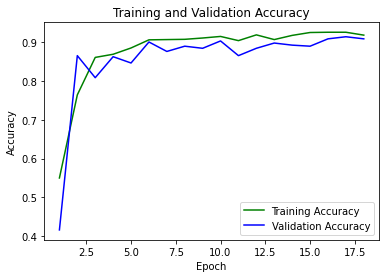

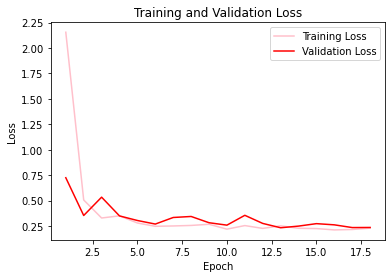

In [9]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
y_pre = np.array([])
y_true = np.array([])
i = 0
for image,label in test_generator:
    i+=1
    y_true =  np.append(y_true,label)
    y = model2.predict(image)
    y =  np.argmax(y,axis =1 )
    y_pre =  np.append(y_pre,y)
    if i == 370 // 32 + 1:
         break


In [11]:
model2.save("model.h5")

In [12]:
model2.evaluate(test_generator)

12/12 [==============================] - 8s 654ms/step - loss: 0.2595 - accuracy: 0.8892


[0.2595050632953644, 0.8891891837120056]

[[121  33]
 [ 10 206]]


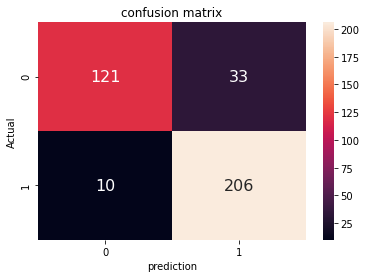

In [13]:
from  sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pre)
print(cm)
import seaborn 
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');